**Current Daily Price of Various Commodities from Various Markets**


In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, trim
from pyspark.sql.types import IntegerType, DoubleType, StringType

spark = SparkSession.builder.appName("DataCleaning").getOrCreate()
file_path = "C:/Users/katin/Downloads/9ef84268-d588-465a-a308-a864a43d0070.csv"

df = spark.read.option("header", True).option("inferSchema", True).csv(file_path)
print("Data loaded successfully")

df.show(5)
df.printSchema()


Data loaded successfully
+--------------+--------+----------+-------------+------------+-----+------------+---------------+---------------+-----------------+
|         State|District|    Market|    Commodity|     Variety|Grade|Arrival_Date|Min_x0020_Price|Max_x0020_Price|Modal_x0020_Price|
+--------------+--------+----------+-------------+------------+-----+------------+---------------+---------------+-----------------+
|Andhra Pradesh| Chittor|  Punganur|       Tomato|      Hybrid|  FAQ|  02/11/2025|           1200|           2140|             1670|
|Andhra Pradesh| Kurnool|Yemmiganur|    Groundnut|       TMV-2|  FAQ|  02/11/2025|           3030|           5929|             5800|
|       Gujarat|  Amreli|  Damnagar|Ginger(Green)|Green Ginger|  FAQ|  02/11/2025|           4050|           5050|             4500|
|       Gujarat| Kachchh|  K.Mandvi|      Brinjal|     Brinjal|  FAQ|  02/11/2025|           2500|           3000|             2750|
|       Gujarat| Kachchh|  K.Mandvi|        

The dataset was successfully loaded from the given CSV file path into a PySpark DataFrame with inferred schema.
The first few rows (show(5)) and schema

In [3]:
print(df.columns)

['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Arrival_Date', 'Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price']


This command displays all column names in the dataset, helping to understand the structure and identify any unusual characters (like spaces or encoded names such as Modal_x0020_Price).

In [4]:
df.groupBy("State").count().orderBy("count", ascending=False).show()

+----------------+-----+
|           State|count|
+----------------+-----+
|   Uttar Pradesh|  437|
|  Madhya Pradesh|  433|
|     Maharashtra|  294|
|         Haryana|  274|
|          Kerala|  268|
|     West Bengal|  186|
|          Punjab|  147|
|         Gujarat|   88|
|       Telangana|   83|
|          Odisha|   59|
|Himachal Pradesh|   46|
|       Karnataka|   41|
|      Uttrakhand|   37|
|         Tripura|   28|
|       Rajasthan|   27|
|    NCT of Delhi|   13|
|      Chandigarh|   10|
|  Andhra Pradesh|    5|
|           Bihar|    4|
+----------------+-----+



The output helps identify which states have the most or least data entries, revealing data distribution across regions.



In [5]:
df.groupBy("Commodity").count().orderBy("count", ascending=False).show()


+--------------------+-----+
|           Commodity|count|
+--------------------+-----+
|               Wheat|  154|
|              Potato|  142|
|               Onion|  136|
|              Tomato|  127|
|               Maize|  109|
|             Brinjal|   95|
| Paddy(Dhan)(Common)|   92|
|        Green Chilli|   86|
|         Cauliflower|   72|
|              Banana|   72|
|Bhindi(Ladies Fin...|   67|
|        Bottle gourd|   60|
|             Cabbage|   57|
|    Cucumbar(Kheera)|   55|
|            Soyabean|   50|
|             Pumpkin|   49|
|        Bitter gourd|   48|
|               Apple|   48|
|                Rice|   37|
|       Ginger(Green)|   35|
+--------------------+-----+
only showing top 20 rows


This groups the data by Commodity and counts how many times each commodity appears in the dataset, then sorts the results in descending order.

In [6]:
df.groupBy("Grade").count().orderBy("count", ascending=False).show()


+-------+-----+
|  Grade|count|
+-------+-----+
|    FAQ| 1748|
|  Local|  325|
|Non-FAQ|  202|
| Medium|  151|
|  Large|   37|
|  Small|   17|
+-------+-----+



This command groups the dataset by Grade and counts the occurrences of each grade, sorting them in descending order of frequency.

In [24]:
from pyspark.sql.functions import col, count, when
missing_counts = df.select([
    count(when(col(c).isNull(), c)).alias(c)
    for c in df.columns
])
missing_counts.show()

+-----+--------+------+---------+-------+-----+------------+---------+---------+-----------+
|State|District|Market|Commodity|Variety|Grade|Arrival_Date|Min_Price|Max_Price|Modal_Price|
+-----+--------+------+---------+-------+-----+------------+---------+---------+-----------+
|    0|       0|     0|        0|      0|    0|           0|        0|        0|          0|
+-----+--------+------+---------+-------+-----+------------+---------+---------+-----------+



The output will display the number of missing (null) values in each column of the dataset. Columns with zero values have complete data, while non-zero values indicate missing entries.


In [8]:
df = df.withColumnRenamed("Min_x0020_Price", "Min_Price") \
       .withColumnRenamed("Max_x0020_Price", "Max_Price") \
       .withColumnRenamed("Modal_x0020_Price", "Modal_Price")
df = df.dropna(subset=["State", "Commodity", "Modal_Price"])


The code renames the columns Min_x0020_Price, Max_x0020_Price, and Modal_x0020_Price to more readable names — Min_Price, Max_Price, and Modal_Price.

In [25]:

df.columns

['State',
 'District',
 'Market',
 'Commodity',
 'Variety',
 'Grade',
 'Arrival_Date',
 'Min_Price',
 'Max_Price',
 'Modal_Price']

This helps confirm that the dataset contains the expected fields and that all columns were read and renamed correctly during preprocessing.

In [26]:
df = df.dropDuplicates()
print(" Duplicates removed:", df.count())

 Duplicates removed: 2480


The printed output displays the total number of rows remaining after duplicates are dropped, confirming that the dataset now contains unique entries.



In [27]:
from pyspark.sql.functions import to_date
df = df.withColumn("Arrival_Date", to_date(col("Arrival_Date"), "dd/MM/yyyy"))


In [28]:
from pyspark.sql.functions import col

df = df.withColumn("Min_Price", col("Min_Price").cast("double")) \
       .withColumn("Max_Price", col("Max_Price").cast("double")) \
       .withColumn("Modal_Price", col("Modal_Price").cast("double"))


In [13]:
df.printSchema()
df.show(5)


root
 |-- State: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Market: string (nullable = true)
 |-- Commodity: string (nullable = true)
 |-- Variety: string (nullable = true)
 |-- Grade: string (nullable = true)
 |-- Arrival_Date: date (nullable = true)
 |-- Min_Price: double (nullable = true)
 |-- Max_Price: double (nullable = true)
 |-- Modal_Price: double (nullable = true)

+--------------+--------------------+--------------------+--------------------+---------------+-----+------------+---------+---------+-----------+
|         State|            District|              Market|           Commodity|        Variety|Grade|Arrival_Date|Min_Price|Max_Price|Modal_Price|
+--------------+--------------------+--------------------+--------------------+---------------+-----+------------+---------+---------+-----------+
|Madhya Pradesh|             Badwani|        Badwani(F&V)|    Cucumbar(Kheera)|       Cucumbar|  FAQ|  2025-11-02|    800.0|    800.0|      800.0|
|      

The schema output displays the data types of all columns after cleaning — ensuring that Arrival_Date is now in DateType, and price columns (Min_Price, Max_Price, Modal_Price) remain numeric for analysis.

In [14]:
print(f"Total Rows: {df.count()}")
print(f"Total Columns: {len(df.columns)}")
df.describe(["Min_Price", "Max_Price", "Modal_Price"]).show()
df.select("State").distinct().count(), df.select("Commodity").distinct().count()


Total Rows: 2480
Total Columns: 10
+-------+------------------+------------------+-----------------+
|summary|         Min_Price|         Max_Price|      Modal_Price|
+-------+------------------+------------------+-----------------+
|  count|              2480|              2480|             2480|
|   mean|3074.1504032258063|3696.3306451612902|3388.033064516129|
| stddev|2841.8152295088903|3304.6783580203564| 2995.90202975319|
|    min|               2.0|               0.0|              5.0|
|    max|           65000.0|           66000.0|          65500.0|
+-------+------------------+------------------+-----------------+



(19, 138)


The describe() output summarizes key statistics (mean, min, max, stddev) for price-related columns, helping understand price distributions.

In [15]:
df.groupBy("State").avg("Modal_Price").orderBy("avg(Modal_Price)", ascending=False).show(10)
df.groupBy("Commodity").avg("Modal_Price").orderBy("avg(Modal_Price)", ascending=False).show(10)


+----------------+------------------+
|           State|  avg(Modal_Price)|
+----------------+------------------+
|         Tripura| 7846.428571428572|
|          Kerala| 4851.671641791045|
|     West Bengal| 4633.322580645161|
|Himachal Pradesh| 4197.826086956522|
|       Telangana|3655.3012048192772|
|       Karnataka|3641.4634146341464|
|  Andhra Pradesh|            3578.8|
|       Rajasthan| 3397.703703703704|
|          Odisha| 3359.322033898305|
|         Haryana| 3321.697080291971|
+----------------+------------------+
only showing top 10 rows
+--------------------+------------------+
|           Commodity|  avg(Modal_Price)|
+--------------------+------------------+
|        Black pepper|           65500.0|
|         Coconut Oil|           37400.0|
|                Fish|           30000.0|
|           Chili Red|16833.333333333332|
|         Mustard Oil|           16716.0|
|  Cummin Seed(Jeera)|           16400.0|
|              Grapes|           13900.0|
|            Peas cod| 

The first result lists the top 10 states with the highest average modal price, highlighting regions where commodities are sold at premium rates — possibly due to demand, quality, or market conditions.

In [16]:
numeric_df = df.select("Min_Price", "Max_Price", "Modal_Price")
for col1 in numeric_df.columns:
    for col2 in numeric_df.columns:
        if col1 != col2:
            corr_value = df.stat.corr(col1, col2)
            print(f"Correlation between {col1} and {col2}: {corr_value}")


Correlation between Min_Price and Max_Price: 0.9135764789879702
Correlation between Min_Price and Modal_Price: 0.977775387822756
Correlation between Max_Price and Min_Price: 0.9135764789879702
Correlation between Max_Price and Modal_Price: 0.9733300573498742
Correlation between Modal_Price and Min_Price: 0.977775387822756
Correlation between Modal_Price and Max_Price: 0.9733300573498742


The correlations between Min_Price, Max_Price, and Modal_Price show how strongly these price metrics are related.

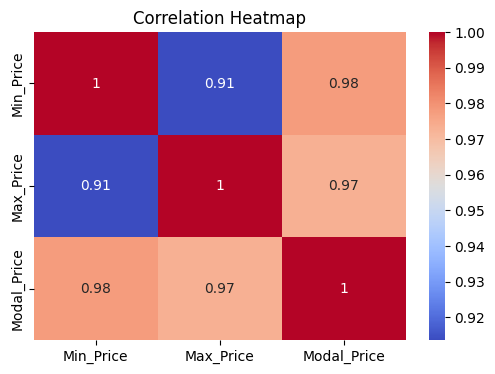

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
pdf = df.select("Min_Price", "Max_Price", "Modal_Price").toPandas()
plt.figure(figsize=(6,4))
sns.heatmap(pdf.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


The heatmap visually confirms strong positive correlations among Min_Price, Max_Price, and Modal_Price.

C:\Users\katin\AppData\Local\Temp\ipykernel_17848\797835960.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_commodities, x="Commodity", y="count", palette="viridis")


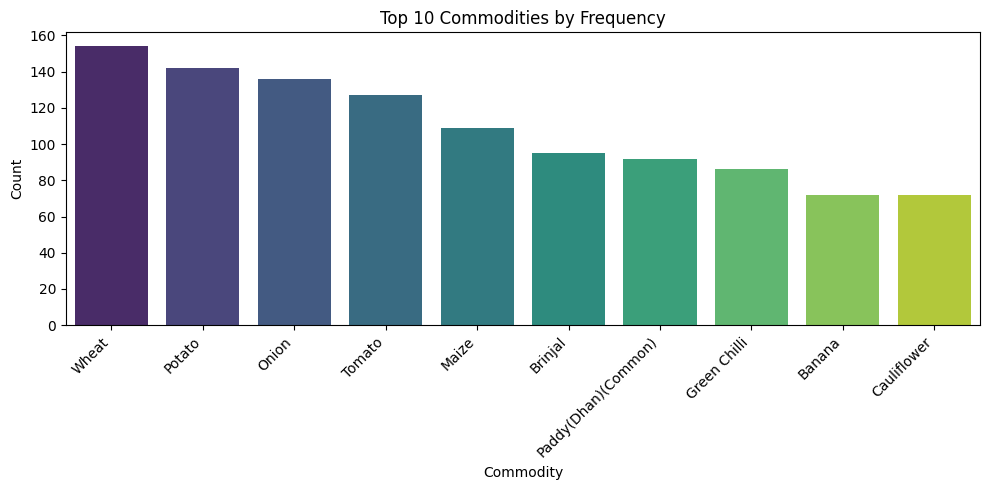

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

top_commodities = (
    df.groupBy("Commodity")
      .count()
      .orderBy("count", ascending=False)
      .limit(10)
      .toPandas()
)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=top_commodities, x="Commodity", y="count", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Commodities by Frequency")
plt.xlabel("Commodity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


The bar chart highlights the top 10 most traded commodities, revealing which products dominate market transactions.

C:\Users\katin\AppData\Local\Temp\ipykernel_17848\1092872335.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_state, x="State", y="avg(Modal_Price)", palette="mako")


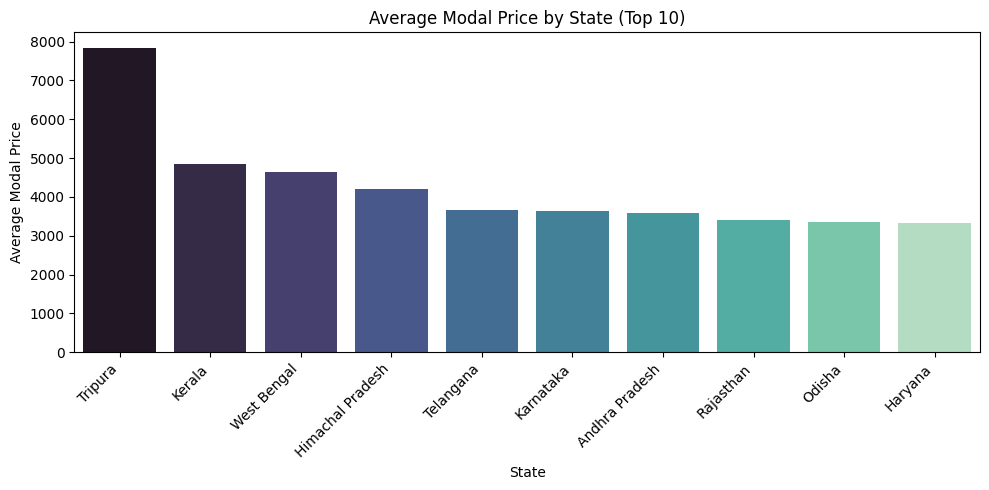

In [19]:
avg_price_state = (
    df.groupBy("State")
      .avg("Modal_Price")
      .orderBy("avg(Modal_Price)", ascending=False)
      .limit(10)
      .toPandas()
)

plt.figure(figsize=(10,5))
sns.barplot(data=avg_price_state, x="State", y="avg(Modal_Price)", palette="mako")
plt.xticks(rotation=45, ha="right")
plt.title("Average Modal Price by State (Top 10)")
plt.xlabel("State")
plt.ylabel("Average Modal Price")
plt.tight_layout()
plt.show()


The visualization shows the top 10 states with the highest average modal prices, highlighting regions with stronger market valuations.

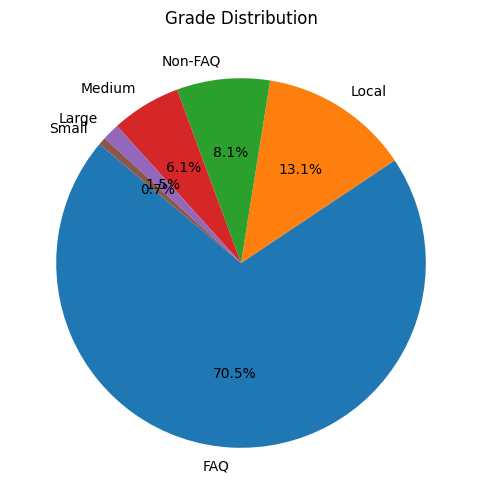

In [20]:
grade_counts = df.groupBy("Grade").count().orderBy("count", ascending=False).toPandas()

plt.figure(figsize=(6,6))
plt.pie(grade_counts["count"], labels=grade_counts["Grade"], autopct="%1.1f%%", startangle=140)
plt.title("Grade Distribution")
plt.show()


The pie chart illustrates the distribution of agricultural produce grades, showing how frequently each grade appears in the dataset.

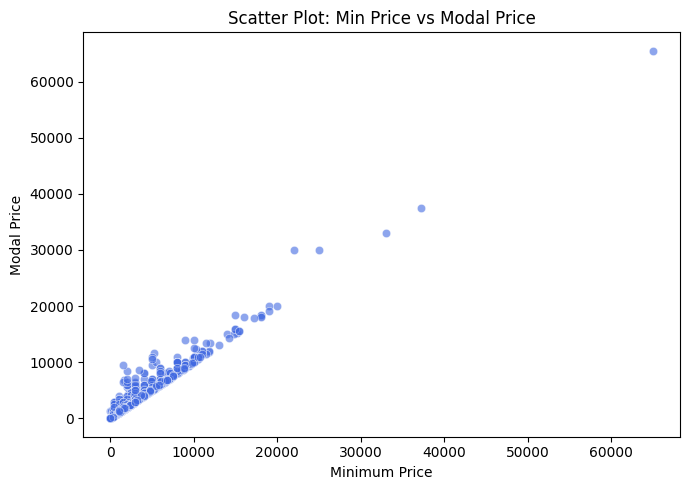

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
scatter_df = df.select("Min_Price", "Max_Price", "Modal_Price").toPandas()

scatter_df = scatter_df.dropna()
plt.figure(figsize=(7,5))
sns.scatterplot(data=scatter_df, x="Min_Price", y="Modal_Price", color="royalblue", alpha=0.6)
plt.title("Scatter Plot: Min Price vs Modal Price")
plt.xlabel("Minimum Price")
plt.ylabel("Modal Price")
plt.tight_layout()
plt.show()


The scatter plot shows a strong positive correlation between Minimum Price and Modal Price, indicating that as the minimum price of commodities increases, the modal price tends to rise as well.

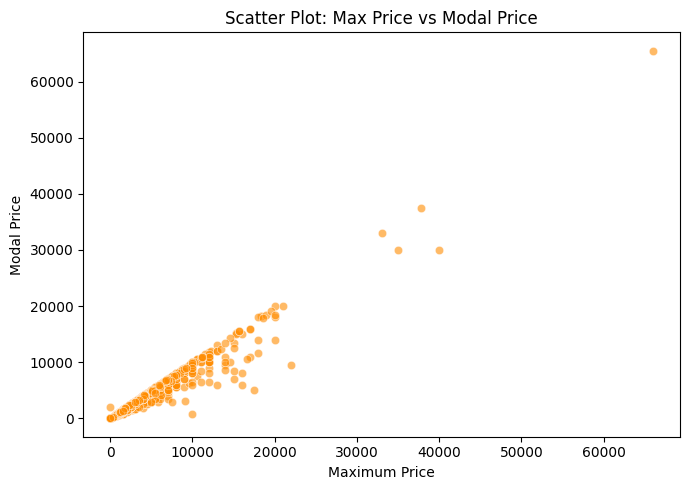

In [22]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=scatter_df, x="Max_Price", y="Modal_Price", color="darkorange", alpha=0.6)
plt.title("Scatter Plot: Max Price vs Modal Price")
plt.xlabel("Maximum Price")
plt.ylabel("Modal Price")
plt.tight_layout()
plt.show()


The scatter plot reveals a strong linear relationship between Maximum Price and Modal Price, implying that higher maximum prices are generally associated with higher modal prices.

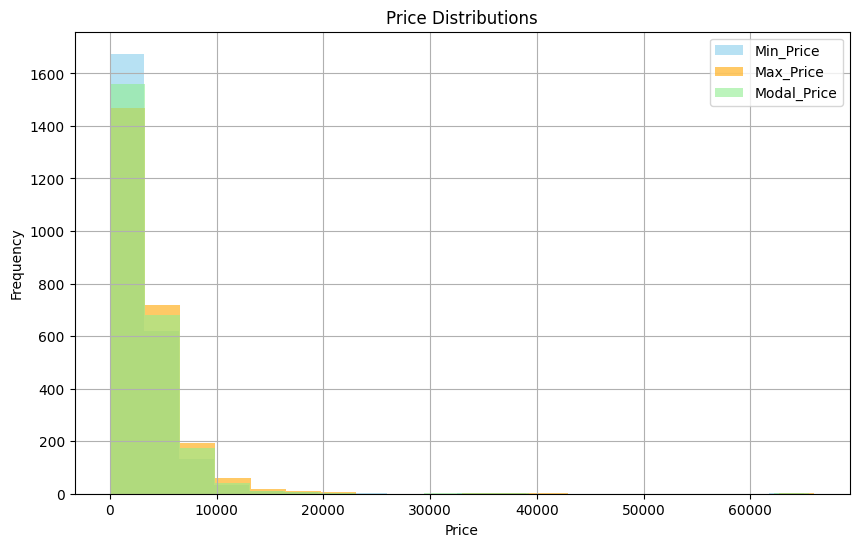

In [23]:
plt.figure(figsize=(10, 6))
pdf["Min_Price"].hist(bins=20, color='skyblue', alpha=0.6, label='Min_Price')
pdf["Max_Price"].hist(bins=20, color='orange', alpha=0.6, label='Max_Price')
pdf["Modal_Price"].hist(bins=20, color='lightgreen', alpha=0.6, label='Modal_Price')

plt.title("Price Distributions")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()


The histogram shows that most prices are concentrated in the lower range, suggesting that many commodities have relatively low minimum, maximum, and modal prices.